#### Veri Ön İşleme

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

* Veri analizi için kütüphaneler : pandas, numpy

* Veri görselleştirmesi için kütüphaneler :  matplotlib, seaborn

* Çıktılardaki uyarıları gizlemek için warnings kütüphanesi kullanılmıştır.

In [2]:
data = pd.read_csv("mushrooms.csv")

* Veri seitimizi python da data değişkeninin içinde atadık.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

* Değikenlerimizin isimlerine, eksik gözlem bilgisine ve değişkenlerin veri tiplerine ulaşmak için .info() kodunu kullandık

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


* head() fonksiyonu ile veri setine ilk bakışımızı yapıyoruz. 23 değişkenimiz var ve çeşitli mantar özellikleri ile bu mantarın zehirli olup olmadığına ilikin bilgi mevcut

In [5]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


* Tüm gözlemleri kategorik değişken olan verimiz için describe kodunun çıktısında değişkenlerin toplam gözlem sayısını, her değişkenin kaç kategorisi olduğunu, bu kategorilerden hangisinin en çok bulunduğunu ve frekansını görebiliriz.

Buradaki kategorik değişkenlerimizin sınıfları arasında bir sıralama olmadığı için object tipinde kalmasında bir sorun yoktur.

##### Eksik gözlem 

* Kaggle platformunda verideki eksik gözlemler "?" ile tutulduğunu ve tüm eksik gözlemlerin stalk-root değişkeninde olduğu bilgisini veri hakkında yazısından öğrendiğimiz için öncelikle verideki bütün gözlemlerin içinde "?" olanları NaN değeri ile değiştirdik.

In [6]:
data = data.replace({"?":np.NaN})

In [7]:
data["stalk-root"].isna().sum()

2480

* Eksik gözlem sayımızın toplamı 2480

In [8]:
data["stalk-root"].mode()

0    b
dtype: object

* Bu eksik gözlemlerin hepsi stalk-root değişkeninde olduğu için eksik gözlemler yerine stalk-root değişkeninin mod değerini yazabiliriz.

In [9]:
data["stalk-root"] = data["stalk-root"].replace({np.NaN:"b"})

In [10]:
data["stalk-root"].isna().sum()

0

* Eksik gözlemlerin doldurulması sonucu artık verimizde eksik gözlem sorunu olmamış oluyor.

* Her değişkenin kaç kategorisi olduğunu ve bu kategorilerin veride nasıl tutulduğunu öğrenmek için data frame değişkeninden kolon isimlerini alıp bir döngünün içinde her sütunun unique yani değişkenin sahip olduğu farklı sınıflara erişebileceğimiz fonksiyonu kullanıp listenin uzunluğunu hesaplatan kodu yazdık:

In [11]:
sutun_adi = data.columns
type(sutun_adi)

pandas.core.indexes.base.Index

In [12]:
for i in sutun_adi:
    print(i + ":")
    print(data[f"{i}"].unique())
    print(str(len(data[f"{i}"].unique())) + " kategori")
    print("------------------------")

class:
['p' 'e']
2 kategori
------------------------
cap-shape:
['x' 'b' 's' 'f' 'k' 'c']
6 kategori
------------------------
cap-surface:
['s' 'y' 'f' 'g']
4 kategori
------------------------
cap-color:
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
10 kategori
------------------------
bruises:
['t' 'f']
2 kategori
------------------------
odor:
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
9 kategori
------------------------
gill-attachment:
['f' 'a']
2 kategori
------------------------
gill-spacing:
['c' 'w']
2 kategori
------------------------
gill-size:
['n' 'b']
2 kategori
------------------------
gill-color:
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
12 kategori
------------------------
stalk-shape:
['e' 't']
2 kategori
------------------------
stalk-root:
['e' 'c' 'b' 'r']
4 kategori
------------------------
stalk-surface-above-ring:
['s' 'f' 'k' 'y']
4 kategori
------------------------
stalk-surface-below-ring:
['s' 'f' 'y' 'k']
4 kategori
------------------------
stalk-color-above-

* En çok gill-color değişkeninde farklı kategoriler var. 

* Değişkenlerin her birinin hangi bilgiyi içerdiğini inceleyelim:

class: edible=e (yenilebilir), poisonous=p (zehirli) ***target değişken***

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s ***başının şekli***

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s ***başının dokusu***

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f ***morluklar***

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s ***koku***

gill-attachment: attached=a,descending=d,free=f,notched=n ***solungaç eki***

gill-spacing: close=c,crowded=w,distant=d ***solungaç aralığı***

gill-size: broad=b,narrow=n ***solungaç boyutu***

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y ***solungaç rengi***

stalk-shape: enlarging=e,tapering=t ***sap şekli***

stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? ***sap kökü***

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s ***sap-yüzey-üstü-halka***

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s ***halka-alttaki sap-yüzey***

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y ***sap-renk-üstü-halka***

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y ***halka-renk altı***

veil-type: partial=p,universal=u ***peçe-tipi***

veil-color: brown=n,orange=o,white=w,yellow=y ***peçe rengi***

ring-number: none=n,one=o,two=t ***zil numarası***

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z ***halka tipi***

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y ***spor-baskı-renk***

population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y ***popülasyon***

habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d ***habitat***

* Veriyi daha yakından tanımak ve grafik yorumlarken ihtiyaç halinde bakmak için değişkenlerin kategorilerinin frekanslarını veren kod for döngüsü ile her değişkenin adını ve value_counts() kodu ile frekansını veriyor.

In [13]:
for i in sutun_adi:
    print(i)
    print(data[f"{i}"].value_counts())
    print("toplam gözlem: " + str(len(data[f"{i}"])))
    print("---------------")

class
e    4208
p    3916
Name: class, dtype: int64
toplam gözlem: 8124
---------------
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
toplam gözlem: 8124
---------------
cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
toplam gözlem: 8124
---------------
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
toplam gözlem: 8124
---------------
bruises
f    4748
t    3376
Name: bruises, dtype: int64
toplam gözlem: 8124
---------------
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
toplam gözlem: 8124
---------------
gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64
toplam gözlem: 8124
---------------
gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64
toplam gözlem: 8124
---------------
gill-size
b    5612
n 

#### Veri görselleştirme

* Veri görselleştirme aşamasında sütun grafiği için ve kırılımlı sütun grafiği (countplot) için Grafik adında bir class oluşturmayı tercih ettik. Bunun sebebi, ilerideki algoritmaları çalıştırdığımda bir değişkenin özelliklerini incelemek istersek hızlıca o değişkenin grafiğini elde edebilmek için.

* Grafik class kodlarının açıklaması:

    def __init__ ile Grafik classının çalışacağı datayı veriye veriyoruz.
    
    bar plot çizimi için bar fonksiyonu oluşturduk. Kullanıcıdan hangi değişkenin sütun grafiğini görmek istediğimizin bilgisini alıyoruz.
    
    Bu değişkenin kategorilerini .barh() fonksiyonu ile yatay eksende (h) bar plot olarak çizdirilmesini sağlıyoruz.

    def countplot ile hue yani kırılıma sahip çubuk grafikler oluşturuyoruz. Burada her değişken için class değişkenini kırılım olarak kullancağız. Bölece değişkenlerin zehirli olanlarının ve yenilebilir olanların sayısına ulaşmış oluyoruz.
    
    edgecolor = (0,0,0) -> sütunların kenarlarının rengi, siyah olacak şekilde ayarladık.
    
    linewidth = 2 -> sütunların kenarlarındaki çizginin genişliği
    
    figsize -> grafiğimizi ön tanımlı boyutundan ziyade daha büyük ayarlamak için figür alanını büyüttük
    
    .annotate() -> sütunların üzerine tam değerlerini yazdıracak olan fonksiyon
    
    
    
    
    

In [14]:
class Grafik:
    
    def __init__(self,data):

        self.data = data
        
    
    def bar(self):
        
        self.degisken = []
        degisken = input("Hangi değişkenin bar plotunu görmek istiyorsunuz?")
        
        print(data[f"{degisken}"]
              .value_counts()
              .plot.barh()
             .set_title(f"{degisken} Değişkeninin Sınıf Frekansı"))
        
    def countplot(self):
        x = input("Hangi değişkenin zehirli olup olmadığının bilgisini görmek istiyorsunuz?")
        hue = data["class"]
        order = data[f"{x}"].value_counts().index
        renkler = ["red","forestgreen"]
        edgecolor = (0,0,0)
        linewidth = 2
        labels = data[f"{x}"].unique()
    
        plt.figure(figsize=(15, 8))
        splot = sns.countplot(data = data,
                              x = x,
                              hue = hue,
                              order = order,
                              palette = renkler,
                              edgecolor= edgecolor,
                              linewidth = linewidth)
        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.1f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center',
                            xytext=(0, 9),
                            textcoords='offset points')
            
        splot.set_xticklabels(labels)
        plt.legend(["Poisonous","Edible"], loc='upper right')
        plt.ylabel('Number of the Mushrooms')
        plt.xlabel(f'Types of the {x} of the Mushrooms')
        plt.title(f'Distribution of the Mushrooms by their Classes and {x}')
        plt.show()

In [15]:
deneme = Grafik(data)

Hangi değişkenin bar plotunu görmek istiyorsunuz?odor
Text(0.5, 1.0, 'odor Değişkeninin Sınıf Frekansı')


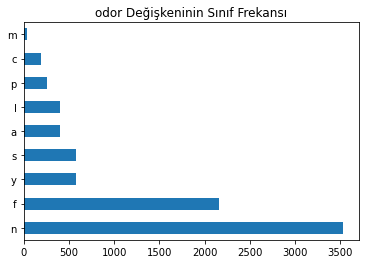

In [16]:
deneme.bar()

Hangi değişkenin zehirli olup olmadığının bilgisini görmek istiyorsunuz?odor


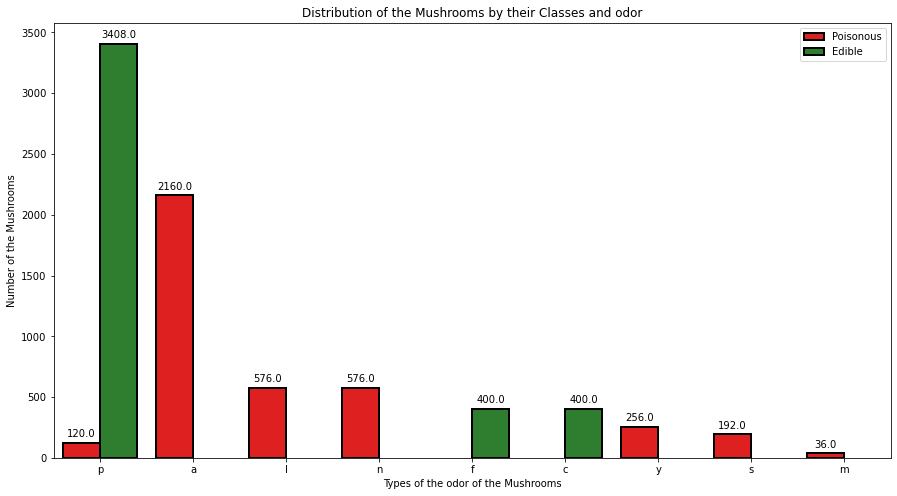

In [17]:
deneme.countplot()

### Veriyi modele hazırlama

* Makine öğrenmesi algoritmaları genel olarak integer tipindeki veri ile çalıştığı için veri setimizde dönüşümler yapmamız gerekiyor.

* hedef değişkenimiz olan class değişkenimize label encoder uygulayarak 0 ve 1 değerlerini alan bir değişkene dönüştürdük.

* kalan diğer tüm değişkenler bizim bağımsız değişkenlerimiz. Bu değişkenlerin her kategorisinin class değişkenini için etkisini görebilmemiz adına değişenlere one-hot-encoding methodu uygulayarak her değişkenin tek bir bilgiyi içerip dummy değişken tuzağından yani bir değişkenin farklı değerlerinden aynı anlamın çıkmasına neden olan durumu ortadan kaldırmış olduk.

In [18]:
df = data.copy()

* öncelikle hedef değişkenimiz olan class değişkenini label encoder ile kullanabileceğimiz hale getirip target adında yeni bir değişken ekleyerek class değişkenini silelim:

In [19]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

df["target"] = lbe.fit_transform(df["class"])

del df["class"]

df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,target
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,1
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,0
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,0
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,1
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,0
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,0
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,0
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,1


* p = 1 ve e = 0 oldu

* kalan bağımsız değişkenlerimize one-hot-encoding uygulayalım:

In [20]:
newsutun_adi = df.columns

len(newsutun_adi), newsutun_adi

(23,
 Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
        'stalk-surface-below-ring', 'stalk-color-above-ring',
        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
        'ring-type', 'spore-print-color', 'population', 'habitat', 'target'],
       dtype='object'))

In [21]:
TrSutunAdi = newsutun_adi[:-1] # target değişkenini bağımsız değişkenlerden ayırdık

len(TrSutunAdi), TrSutunAdi

(22,
 Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
        'stalk-surface-below-ring', 'stalk-color-above-ring',
        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
        'ring-type', 'spore-print-color', 'population', 'habitat'],
       dtype='object'))

* Oluşan yeni değişkenlerin isimlendirilmesinde kategorinin adını temsil eden son eki eklemek için kullanılan parametre ayarı.

In [22]:
for i in newsutun_adi:
    if i == "target":
        break
    else:
        df = pd.get_dummies(df, columns = [f"{i}"], prefix = [f"{i}"])    
df

,target,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


* tüm değişkenlerimize dönüşüm işlemini uyguladık

* 117 sütunumuz oldu

* şimdi verimizi eğitim ve test olarak bölelim:

In [23]:
x = df.iloc[:,1:] # bağımsız değişkenler
y = df.iloc[:,0:1] # bağımlı değişken (target)

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

* test_size=0.33 -> Veri setinin %67' si eğitim verisi olarak, kalan %33' ü de test verisi olarak kullanulacak

* Bazı algoritmalar ölçeklendirilmiş (aynı evrene indirgenmiş) veri ile çalıştığı için verimizin ölçeklenmiş halini de oluşturalım:

In [25]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.fit_transform(x_test)

### Model

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#### 1. SVM Sınıflandırma

* SVM algoritması class değişkeni p olan sınıflar ve e olan sınıflar birbirinden ayrılacak şekilde bir marjin alanı oluşturacaktır.

* Sonuçta eğitim verilerimiz svc algoritmasıyla eğitildikten sonra eğitim verilerimiz için bu algoritmayı çalıştırıyoruz ve model bu yeni gözlemler için marjinin ayırdığı "p" bölgesine mi yoksa "e" bölgesine mi düştüğüne bakarak sınıflandırma yapıyor.

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.svm import SVC
svc = SVC() # SVC algoritmasını kullanmamızı sağlayacak değişkeni oluşturduk
svc.fit(x_train,y_train) # eğitim verilerimizi kullanarak modeli kurduk (eğittik)

y_pred = svc.predict(x_test) # eğtilmiş modeli kullanarak yeni gözlemler için tahmin yapmayı sağlayan kod.

cm = confusion_matrix(y_test,y_pred) # gerçek test verileri ile tahmini yapılan verileri karşılaştırmak için cm oluşturduk
print('SVC')
print(cm)

SVC
[[1406    0]
 [   0 1275]]


* Verilerin hepsi doğru sınıflandırılmışır.

In [29]:
accuracy_score(y_test, y_pred)

1.0

* SVM algoritması ile test edilmiş verimiz bütün tahminlerini doğru yapmıştır.

* cross validation yöntemi ile modelimizi doğrulayalım:

Cross-validation, makine öğrenmesi modelinin görmediği veriler üzerindeki performansını mümkün olduğunca objektif ve doğru bir şekilde değerlendirmek için kullanılan istatistiksel bir yeniden örnekleme(resampling) yöntemidir.

örneğin : k katlı bir cross-validation uygulandığında farklı bölünmeler için farklı accuracy skorları elde ederiz.

In [30]:
scores = cross_val_score(svc, x, y, cv=10, scoring='f1')
scores,scores.mean()

(array([0.51515152, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.89269406, 1.        ]),
 0.9407845579078457)

cross_val_score fonksiyonunun

1. argümanı : modelimiz

2. argümanı : Bu model içine yerleştirilmek istenen bağımsız değişken seti

3. argümanı : Bu model sonucunda ortaya çıkacak olan tahmini bağımlı değişkenleri karşılaştrımak istediğimiz y değerleri

4. argüman : cross validation ı kaç katlı yapacağımız

hesapladığımız çapraz doğrulama değerlerinin ortalaması, kurduğumuz modelin doğruluğunu gösteren değerdir.

#### 2.KNN Sınıflandırma

* Sınıflandırmada (classification) kullanılan bu algoritmaya göre sınıflandırma sırasında çıkarılan özelliklerden (feature extraction), sınıflandırılmak istenen yeni bireyin daha önceki bireylerden k tanesine yakınlığına bakılmasıdır.

* Örneğin k = 2 için yeni bir eleman sınıflandırılmak istensin. bu durumda eski sınıflandırılmış elemanlardan en yakın 2 tanesi alınır. Bu elamanlar hangi sınıfa dahilse, yeni eleman da o sınıfa dahil edilir. Mesafe hesabından genelde öklit mesafesi (euclid distance) kullanılabilir.

* biz de euclidean metriğini kullanacaz. Şöyle hesaplanır: 	sqrt(sum((x - y)^2))

* Çeşitli KNN algoritması vardır. Bunlarda birisi Lazzy learning —> öncesinden öğrenme yapmaz, yeni bir örnek geldiğinde eski örnekler ile yakınlık karşılarştırılır. eager learning —> sınıflandırma bölgelerini önceden öğreniyor, yeni bir örnek geldiğinde bu bölgelere göre sınıflandırma yapılır

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric= 'euclidean')
knn.fit(X_train_sc,y_train)
ypred = knn.predict(X_test_sc)
cm = confusion_matrix(y_test,y_pred)
cm

array([[1406,    0],
       [   0, 1275]], dtype=int64)

In [32]:
accuracy_score(y_test, y_pred)

1.0

In [33]:
scores = cross_val_score(knn, x, y, cv=10, scoring='f1')
scores, scores.mean()

(array([0.51515152, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.8978186 , 1.        ]),
 0.9412970114462652)

* Modelimizin başarısının %94 olduğunu söyleyebiliriz.

### Değişken Seçimi

**1.Chi-Squared (Ki-kare) Yöntemi**

Chi-squared (ki-kare) testi girdi ve çıktı iki kategorik değişken arasında istatistiksel anlamlılık düzeyinde ilişki olup olmadığını ölçümler.

Çıktı değişken ile yapılan analizde değişkenin ikili (binary) olması beklenir.

In [34]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Kalmasını istediğiniz değişken sayısı
select_k = 10 # 10 tane değişken seçmek istiyorum

# Değişkenlerin seçim stratejisi belirlenir
# chi2 = Ki-kare yönteminin kullanılmasıdır
selection = SelectKBest(chi2, k=select_k).fit(x_train, y_train)

# İlişkili olan değişkenler gösterilir.
features = x_train.columns[selection.get_support()]
print(features)

Index(['bruises_t', 'odor_f', 'odor_n', 'gill-size_n', 'gill-color_b',
       'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k',
       'ring-type_l', 'ring-type_p', 'spore-print-color_h'],
      dtype='object')


* Değişken seçiminden seçtiğimiz değişkenler ile devam edelim:

In [35]:
dfChi = pd.DataFrame(df, columns = features)

In [36]:
dfChi

,bruises_t,odor_f,odor_n,gill-size_n,gill-color_b,stalk-surface-above-ring_k,stalk-surface-below-ring_k,ring-type_l,ring-type_p,spore-print-color_h
0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0
3,1,0,0,1,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,0,0,1,0
8120,0,0,1,0,0,0,0,0,1,0
8121,0,0,1,0,0,0,0,0,1,0
8122,0,0,0,1,1,0,1,0,0,0


* Ki kare yöntemi ile seçilen değişkenler için train ve test setlerini oluşturalım:

In [37]:
x_trainChi, x_testChi,y_trainChi,y_testChi = train_test_split(dfChi,y,test_size=0.33, random_state=0)

In [38]:
XChi_train_sc = sc.fit_transform(x_trainChi)
XChi_test_sc = sc.fit_transform(x_testChi)

#### 1.1 SVM Sınıflandırma

In [39]:
from sklearn.svm import SVC

svcChi= SVC()

svcChi.fit(x_trainChi,y_trainChi)

y_predChi = svcChi.predict(x_testChi)

cm = confusion_matrix(y_testChi,y_predChi)
print('SVC Chi-Square değişken seçimi ile')
print(cm)

SVC Chi-Square değişken seçimi ile
[[1369   37]
 [  25 1250]]


In [40]:
accuracy_score(y_testChi, y_predChi)

0.9768743006340918

* Değişken seçiminden sonra SVM algoritmasının başarısı %97 doğru tahmindir.

In [41]:
scores = cross_val_score(svcChi, dfChi, y, cv=10, scoring='f1')
scores, scores.mean()

(array([0.51515152, 0.95018226, 0.98612863, 0.98595147, 0.96596859,
        0.9448183 , 1.        , 1.        , 0.89269406, 0.99485861]),
 0.9235753435670636)

* doğrualama yöntemini cross validation a göre yaptığımızda bu başarı %92 oluyor. Bu yöntem daha güvenilirdir.

#### 1.2 KNN Sınıflandırma

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knnChi = KNeighborsClassifier(n_neighbors=2, metric= 'euclidean')
knnChi.fit(XChi_train_sc,y_train)
ypred = knnChi.predict(XChi_test_sc)
cm = confusion_matrix(y_testChi,ypred)
cm

array([[1369,   37],
       [  25, 1250]], dtype=int64)

In [43]:
accuracy_score(y_testChi, ypred)

0.9768743006340918

In [44]:
scores = cross_val_score(knnChi, dfChi, y, cv=10, scoring='f1')
scores, scores.mean()

(array([0.51515152, 0.95018226, 0.99872286, 0.98595147, 0.96596859,
        0.9448183 , 1.        , 1.        , 0.99485861, 0.99485861]),
 0.9350512218887825)

* Modelimizin yaptığı tahminlerin % 93 ini doğru sınıflandırmıştır.

#### 2. Random Forest Importance

Algoritma daha az ilgilli olduğu istatistiksel olarak kanıtlanan değişkenleri yinelemeli olarak eler. 

Random Forest sınıflandırma algoritması nispeten birçok algoritmaya göre daha hızlıdır. Hiper parametreler ayarlanmadan kullanılabilir ve değişken öneminin(feature importance) sayısal bir tahminini verir. Birden fazla zayıf sınıflandırıcının(karar ağacı) oylaması ile sınıflandırmanın yapıldığı bir yöntemdir. Bu ağaçlar, eğitim setinin farklı örnekleri üzerinde bağımsız olarak geliştirilir.

Önem ölçüsü, Random Forest sınıflandırıcısının rasgeleliğine bağlı olarak değişir. (Random Forest’ta her seferinde farklı ağaç kurulur ve farklı sonuçlar çıkar) Ek olarak, veri setindeki önemli olmayan özniteliklerin varlığına duyarlıdır. Bu nedenle, istatistiksel olarak geçerli sonuçlar elde etmek için bu işlem iterasyonlu şekilde devam eder.


***farklı yorumlamalar sunumda da var***

In [45]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [46]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train_sc, y_train)

y_pred = clf.predict(X_test_sc)

y_pred

array([1, 0, 0, ..., 1, 0, 1])

<AxesSubplot:>

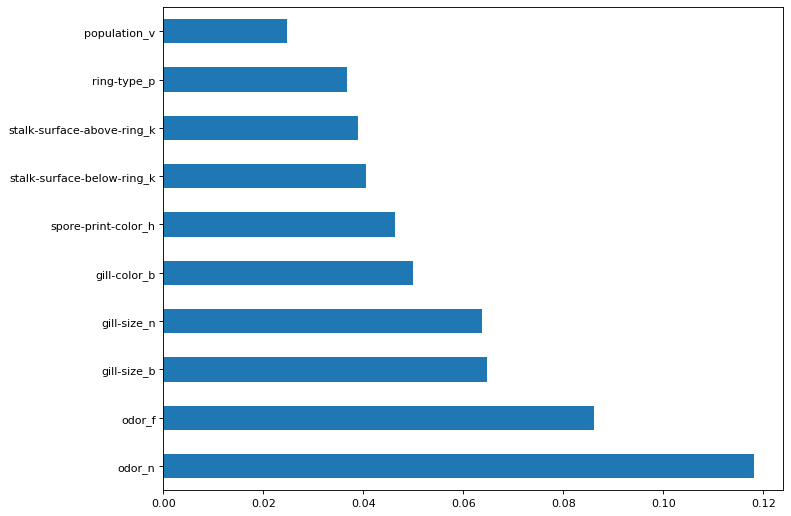

In [47]:
# visualize feature importance

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_, index= x.columns)

feat_importances.nlargest(10).plot(kind='barh')

In [48]:
I = feat_importances.nlargest(10)

I = pd.DataFrame(I).index

df_RF = pd.DataFrame(df, columns = I) # yeni veri seti

df_RF

,odor_n,odor_f,gill-size_b,gill-size_n,gill-color_b,spore-print-color_h,stalk-surface-below-ring_k,stalk-surface-above-ring_k,ring-type_p,population_v
0,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8119,1,0,1,0,0,0,0,0,1,0
8120,1,0,1,0,0,0,0,0,1,1
8121,1,0,1,0,0,0,0,0,1,0
8122,0,0,0,1,1,0,1,0,0,1


In [49]:
x_trainRF, x_testRF,y_trainRF,y_testRF = train_test_split(df_RF,y,test_size=0.33, random_state=0)

In [50]:
XRF_train_sc = sc.fit_transform(x_trainRF)
XRF_test_sc = sc.fit_transform(x_testRF)

* RF değişken seçimi ile elde ettiğimiz 10 değişken için veri setimizi tekrardan oluşturduk 

#### 2.1 SVM Sınıflandırma

In [51]:
from sklearn.svm import SVC

svcRF = SVC()
svcRF.fit(x_trainRF,y_trainRF)

y_predRF = svcRF.predict(x_testRF)

cm = confusion_matrix(y_testRF,y_predRF)
print('SVC')
print(cm)

SVC
[[1369   37]
 [  24 1251]]


In [52]:
accuracy_score(y_testRF, y_predRF)

0.9772472957851548

In [53]:
scores = cross_val_score(svcRF, df_RF, y, cv=10, scoring='f1')
scores, scores.mean()

(array([0.95377129, 0.95018226, 0.98484848, 0.98595147, 0.95915679,
        0.94197031, 1.        , 1.        , 0.89269406, 0.99485861]),
 0.9663433274507826)

* modelin başarısı % 97

#### 2.2 KNN Sınıflandırma

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knnRF = KNeighborsClassifier(n_neighbors=4, metric= 'euclidean')
knnRF.fit(XRF_train_sc,y_train)
ypred = knnRF.predict(XRF_test_sc)
cm = confusion_matrix(y_testRF,ypred)
cm

array([[1406,    0],
       [  95, 1180]], dtype=int64)

In [55]:
accuracy_score(y_testRF, ypred)

0.9645654606490116

In [56]:
scores = cross_val_score(knnRF, df_RF, y, cv=10, scoring='f1')
scores, scores.mean()

(array([0.75949367, 0.91262136, 0.98484848, 0.98343949, 0.95915679,
        0.94197031, 1.        , 1.        , 0.97142857, 1.        ]),
 0.9512958672467399)

* Modelimiz test verilerini %95 doğru sınıflandırdı

#### Sonuç

* Birkaç yöntem ile model eğittikten sonra tahmin için Random Forest ile değişken seçimi yapılmış SVC modelini kullanarak tahmin denemesi yapalım.

In [57]:
y_deneme = pd.DataFrame([[1,0,1,0,0,1,1,0,0,1]], columns = I)

y_deneme

,odor_n,odor_f,gill-size_b,gill-size_n,gill-color_b,spore-print-color_h,stalk-surface-below-ring_k,stalk-surface-above-ring_k,ring-type_p,population_v
0,1,0,1,0,0,1,1,0,0,1


In [58]:
SVM_predRF = svcRF.predict(y_deneme)
print("girdiğimiz özelliklere sahip bir mantar için Random Forest ile değişken seçimi yapılmış SVC modelini kullanarak sınıflandırma sonucu = " + str(SVM_predRF))

SVM_predChi = svcChi.predict(y_deneme)
print("girdiğimiz özelliklere sahip bir mantar için Chi-Square ile değişken seçimi yapılmış SVC modelini kullanarak sınıflandırma sonucu = " + str(SVM_predChi))

KNN_predRF = knnRF.predict(y_deneme)
print("girdiğimiz özelliklere sahip bir mantar için Random Forest ile değişken seçimi yapılmış KNN modelini kullanarak sınıflandırma sonucu = " + str(KNN_predRF))

KNN_predChi = knnChi.predict(y_deneme)
print("girdiğimiz özelliklere sahip bir mantar için Chi-Square ile değişken seçimi yapılmış KNN modelini kullanarak sınıflandırma sonucu = " + str(KNN_predChi))


girdiğimiz özelliklere sahip bir mantar için Random Forest ile değişken seçimi yapılmış SVC modelini kullanarak sınıflandırma sonucu = [0]
girdiğimiz özelliklere sahip bir mantar için Chi-Square ile değişken seçimi yapılmış SVC modelini kullanarak sınıflandırma sonucu = [1]
girdiğimiz özelliklere sahip bir mantar için Random Forest ile değişken seçimi yapılmış KNN modelini kullanarak sınıflandırma sonucu = [0]
girdiğimiz özelliklere sahip bir mantar için Chi-Square ile değişken seçimi yapılmış KNN modelini kullanarak sınıflandırma sonucu = [0]
